In [216]:
import requests
import os
import urllib
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [217]:
merged_df = pd.read_csv("..\Final_Datasets\MergedTVandMovies.csv", dtype='unicode', encoding='utf8' )    

merged_df["IMDb"] = merged_df["IMDb"].astype(float)
merged_df["Netflix"] = merged_df["Netflix"].astype(float)
merged_df["Hulu"] = merged_df["Hulu"].astype(float)
merged_df["Prime Video"] = merged_df["Prime Video"].astype(float)
merged_df["Disney+"] = merged_df["Disney+"].astype(float)
merged_df["IMDb"] =round(merged_df["IMDb"])

merged_df.head()


,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,9.0,87%,1.0,0.0,0.0,0.0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148,Movie,NaN
1,1,The Matrix,1999,18+,9.0,87%,1.0,0.0,0.0,0.0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136,Movie,NaN
2,2,Avengers: Infinity War,2018,13+,8.0,84%,1.0,0.0,0.0,0.0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149,Movie,NaN
3,3,Back to the Future,1985,7+,8.0,96%,1.0,0.0,0.0,0.0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116,Movie,NaN
4,4,"The Good, the Bad and the Ugly",1966,18+,9.0,97%,1.0,0.0,1.0,0.0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161,Movie,NaN


In [218]:
df1 = merged_df[["IMDb", "Netflix","Hulu", "Prime Video", "Disney+", "movies", "shows" ]]
df1.head()


,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
0,9.0,1.0,0.0,0.0,0.0,Movie,NaN
1,9.0,1.0,0.0,0.0,0.0,Movie,NaN
2,8.0,1.0,0.0,0.0,0.0,Movie,NaN
3,8.0,1.0,0.0,0.0,0.0,Movie,NaN
4,9.0,1.0,0.0,1.0,0.0,Movie,NaN


In [219]:
#Overall mean IMDB value
df1_mean= round(df1["IMDb"].mean(),2)
df1_mean

6.16

In [220]:
#overall mean IMDB value for TVshows

df1_tvshows = df1.loc[merged_df['shows'] == 'TV']
df1_mean_tvshows_IMDB = df1_tvshows["IMDb"]
overall_tvshow_avg_IMDB = round(df1_mean_tvshows_IMDB.mean(),2)
overall_tvshow_avg_IMDB

7.11

In [221]:
#overal mean IMDB value for Movies
df1_movies = df1.loc[merged_df['movies'] == 'Movie']
df1_mean_movies_IMDB = df1_movies["IMDb"]
round(df1_mean_movies_IMDB.mean(),2)

5.9

In [222]:
#Drops null IMDB row from TV_shows DF
df_tv_shows_notnull = pd.notnull(df1_tvshows["IMDb"])
df_tv_shows_IMDb_notnull = df1_tvshows[df_tv_shows_notnull]
df_tv_shows_IMDb_notnull

,IMDb,Netflix,Hulu,Prime Video,Disney+,movies,shows
16744,10.0,1.0,0.0,0.0,0.0,NaN,TV
16745,9.0,1.0,0.0,0.0,0.0,NaN,TV
16746,8.0,1.0,0.0,0.0,0.0,NaN,TV
16747,9.0,1.0,0.0,0.0,0.0,NaN,TV
16748,9.0,1.0,0.0,0.0,0.0,NaN,TV
...,...,...,...,...,...,...,...
22342,5.0,0.0,0.0,0.0,1.0,NaN,TV
22343,8.0,0.0,0.0,0.0,1.0,NaN,TV
22344,9.0,0.0,0.0,0.0,1.0,NaN,TV
22345,7.0,0.0,0.0,0.0,1.0,NaN,TV


In [223]:
#count of all tv shows on each site


df_netflix = df_tv_shows_IMDb_notnull.loc[df_tv_shows_IMDb_notnull['Netflix'] == 1]
df_hulu = df_tv_shows_IMDb_notnull.loc[df_tv_shows_IMDb_notnull['Hulu'] == 1]
df_prime_video = df_tv_shows_IMDb_notnull.loc[df_tv_shows_IMDb_notnull['Prime Video'] == 1]
df_disney = df_tv_shows_IMDb_notnull.loc[df_tv_shows_IMDb_notnull['Disney+'] == 1]
print(len(df_netflix))
print(len(df_hulu))
print(len(df_prime_video))
print(len(df_disney))

1811
1517
1307
169


In [224]:
df_netflix = df_netflix[['IMDb', 'Netflix']]
df_netflix['Netflix'] = df_netflix['Netflix'].replace([1], 'netflix')
df_netflix.columns = ['IMDB', 'Source']


df_hulu = df_hulu[['IMDb', 'Hulu']]
df_hulu['Hulu'] = df_hulu['Hulu'].replace([1], 'hulu')
df_hulu.columns = ['IMDB', 'Source']

df_prime_video = df_prime_video[['IMDb', 'Prime Video']]
df_prime_video['Prime Video'] = df_prime_video['Prime Video'].replace([1], 'prime')
df_prime_video.columns = ['IMDB', 'Source']


df_disney = df_disney[['IMDb', 'Disney+']]
df_disney ['Disney+'] = df_disney ['Disney+'].replace([1], 'disney')
df_disney.columns = ['IMDB', 'Source']


#df['column name'] = df['column name'].replace(['old value'],'new value')
print(df_netflix)
print(df_hulu)
print(df_prime_video)
print(df_disney)




       IMDB   Source
16744  10.0  netflix
16745   9.0  netflix
16746   8.0  netflix
16747   9.0  netflix
16748   9.0  netflix
...     ...      ...
18592   5.0  netflix
18595   7.0  netflix
18601   6.0  netflix
18610   3.0  netflix
18616   3.0  netflix

[1811 rows x 2 columns]
       IMDB Source
16757   9.0   hulu
16759   9.0   hulu
16760   8.0   hulu
16762   9.0   hulu
16766   9.0   hulu
...     ...    ...
20131   7.0   hulu
20132   4.0   hulu
20133   4.0   hulu
20144   6.0   hulu
20145   6.0   hulu

[1517 rows x 2 columns]
       IMDB Source
16762   9.0  prime
16807   9.0  prime
16815   8.0  prime
16821   8.0  prime
16832   8.0  prime
...     ...    ...
21465   7.0  prime
21472   7.0  prime
21473   3.0  prime
21477   5.0  prime
21478   5.0  prime

[1307 rows x 2 columns]
       IMDB  Source
17216   7.0  disney
17260   6.0  disney
17307   8.0  disney
17335   6.0  disney
17590   6.0  disney
...     ...     ...
22342   5.0  disney
22343   8.0  disney
22344   9.0  disney
22345   7.0  disn

In [225]:
imdb_df = pd.concat([df_netflix, df_hulu, df_prime_video,  df_disney], ignore_index=True, sort=False)
imdb_df.dtypes
imdb_df["IMDB"] =imdb_df["IMDB"].astype(str)
imdb_df


,IMDB,Source
0,10.0,netflix
1,9.0,netflix
2,8.0,netflix
3,9.0,netflix
4,9.0,netflix
...,...,...
4799,5.0,disney
4800,8.0,disney
4801,9.0,disney
4802,7.0,disney


In [226]:
#imdb_df_group = imdb_df.groupby(["Source", "IMDB"]).count()
#imdb_df_group

#imdb_df_group = df.groupby("Source")["IMDB"].transform('count')
#imdb_df_group

#imdb_df_group = imdb_df.groupby(["Source" , "IMDB"]).count()

#imdb_df_group = imdb_df.groupby("Source")["IMDB"].agg('nunique').reset_index(drop=False)
imdb_df_group =  imdb_df.groupby(["Source", "IMDB"]).size().reset_index(name="Time")



#works sort of
#imdb_df['count'] = imdb_df.groupby(["Source" , "IMDB"]).transform('count')
#imdb_df

imdb_df_group


,Source,IMDB,Time
0,disney,4.0,1
1,disney,5.0,14
2,disney,6.0,46
3,disney,7.0,49
4,disney,8.0,51
5,disney,9.0,8
6,hulu,10.0,2
7,hulu,2.0,9
8,hulu,3.0,15
9,hulu,4.0,47


In [227]:
#AVG IIMDB TV show rating for netlix
netlix_tvshow_avg_IMDB = round(df_netflix["IMDB"].mean(),2)
netlix_tvshow_avg_IMDB

7.16

In [228]:
#AVG IIMDB TV show rating for Hulu
hulu_tvshow_avg_IMDB = round(df_hulu["IMDB"].mean(),2)
hulu_tvshow_avg_IMDB

7.06

In [229]:
#AVG IIMDB TV show rating for Prime Video
prime_tvshow_avg_IMDB = round(df_prime_video["IMDB"].mean(),2)
prime_tvshow_avg_IMDB

7.17

In [230]:
#AVG IIMDB TV show rating for Disney+
disney_tvshow_avg_IMDB = round(df_disney["IMDB"].mean(),2)
disney_tvshow_avg_IMDB

6.94

KeyError: 'count'

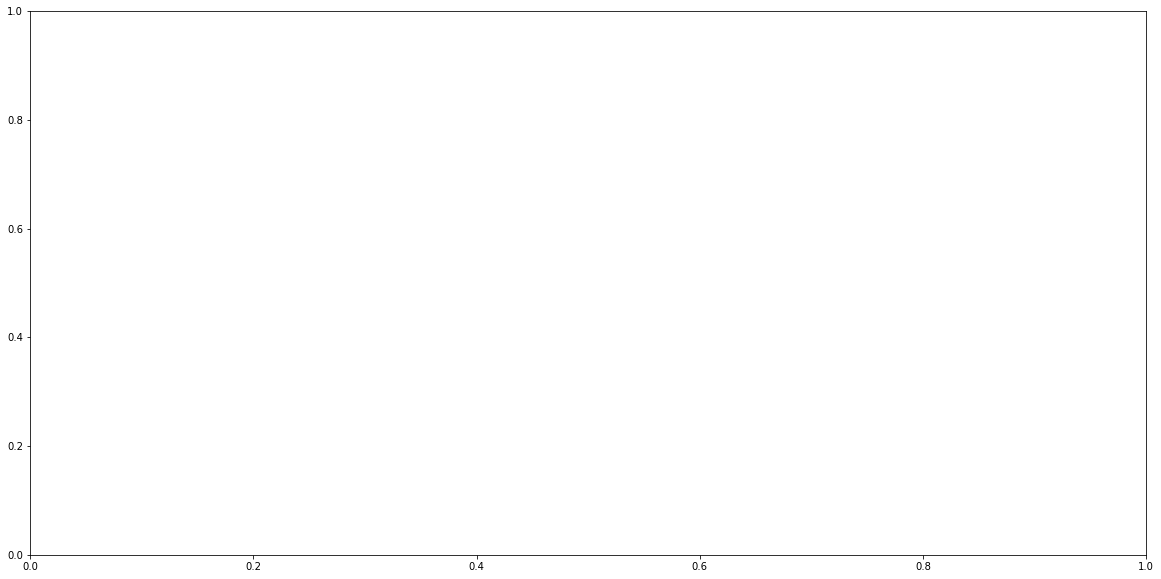

In [231]:
fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(len(imdb_df.Source.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, imdb_df.loc[imdb_df['IMDB'] ==1, 'count'],
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x, imdb_df.loc[imdb_df['IMDB'] ==2, 'count'],
            width=bar_width)


In [ ]:
x_axis = [ "Netflix","Hulu", "Prime Video", "Disney+"]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("IMBD ratings for each data source")
plt.xlabel("Source")
plt.ylabel("IMDB Rating")
plt.bar(x_axis, imdb_df['IMDB'] )
plt.show


In [ ]:
#setting pie_chart
labels= [Netfl]
y_axis

In [ ]:
df_shows = df_tv_shows_IMDb_notnull[['Netflix', 'Hulu', 'Prime Video', 'Disney+']]
df_shows

In [ ]:
df_shows.apply(pd.value_counts)